In [19]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import datasets
from mpl_toolkits.mplot3d import Axes3D
%matplotlib notebook

In [20]:
iris = datasets.load_iris()
iris_df = pd.DataFrame(iris.data,columns = iris.feature_names)

In [21]:
iris_df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [22]:
# Exploring optimum number of clusters for k-means classification 
x = iris_df.iloc[:,[0,1,2,3]].values  # selecting all the values from all the columns

from sklearn.cluster import KMeans
wcss = []  # Within the cluster sum of squares

for i in range(1,11):
    kmeans = KMeans(n_clusters = i ,init = 'k-means++',max_iter=300,n_init=10,random_state=0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)

<IPython.core.display.Javascript object>


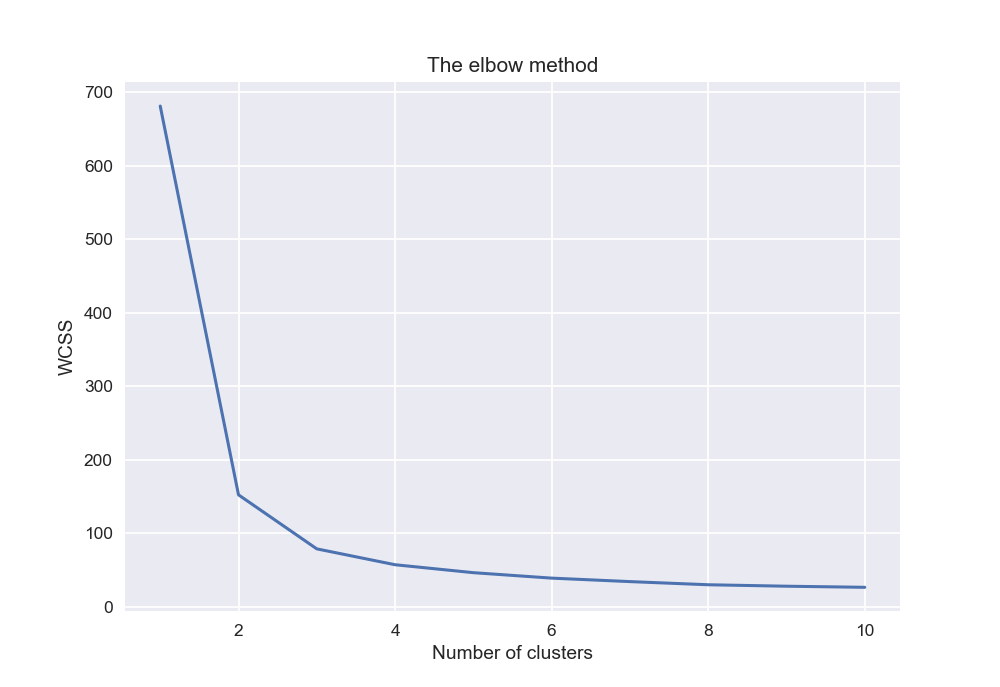

In [23]:
# PLotting the results on the line graph to observe the elbow
plt.style.use("seaborn")
plt.plot(range(1,11),wcss)
plt.title("The elbow method")
plt.xlabel("Number of clusters")
plt.ylabel("WCSS") # Within the cluster sum of squares
plt.show()

<b><i>We can clearly see that why it is called 'The elbow method' from the above graph,the optimum cluster is where the elbow occurs.This is when the within cluster sum of squares(WCSS) doesn't decrease significantly with every iteration</i></b>

From this we opt to choose the number of clusters as 3

In [24]:
# Now since we have found the effective number of clusters so we will apply kmeans now considering the number of clusters as 3
kmeans = KMeans(n_clusters = 3,init='k-means++',max_iter=300,n_init=10,random_state=0)
y_kmeans = kmeans.fit_predict(x)

<IPython.core.display.Javascript object>


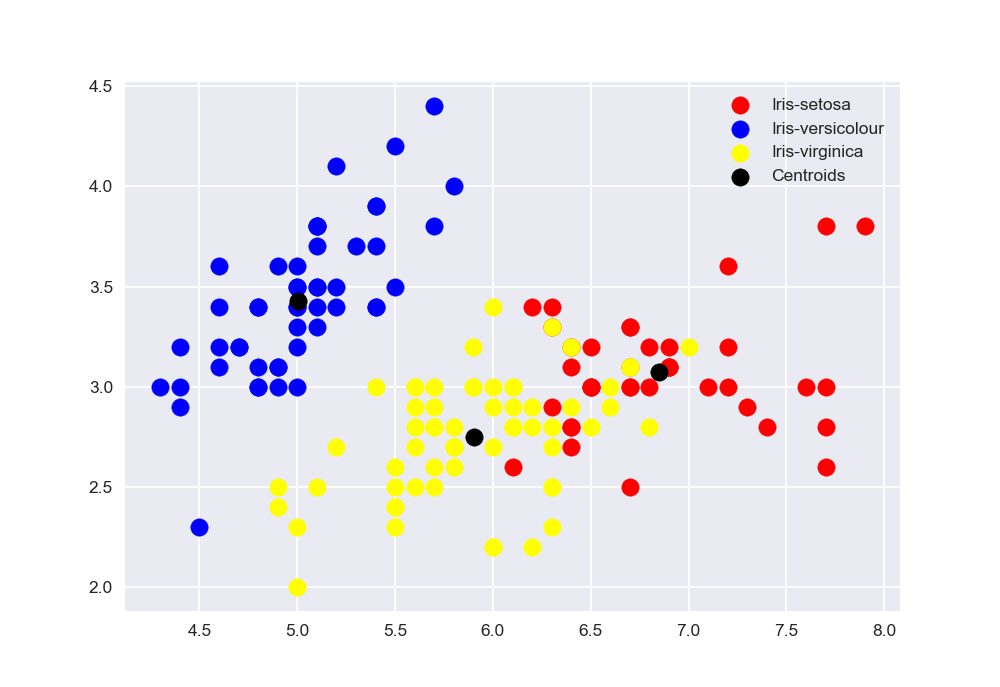

In [25]:
plt.scatter(x[y_kmeans==0,0],x[y_kmeans==0,1],s=100,c='red',label='Iris-setosa')
plt.scatter(x[y_kmeans==1,0],x[y_kmeans==1,1],s=100,c='blue',label='Iris-versicolour')
plt.scatter(x[y_kmeans==2,0],x[y_kmeans==2,1],s=100,c='yellow',label='Iris-virginica')

# Now Plot Centroids of clsuters
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],s=100,c='black',label='Centroids')

plt.legend()

### 3D Visualization of the plot

<IPython.core.display.Javascript object>


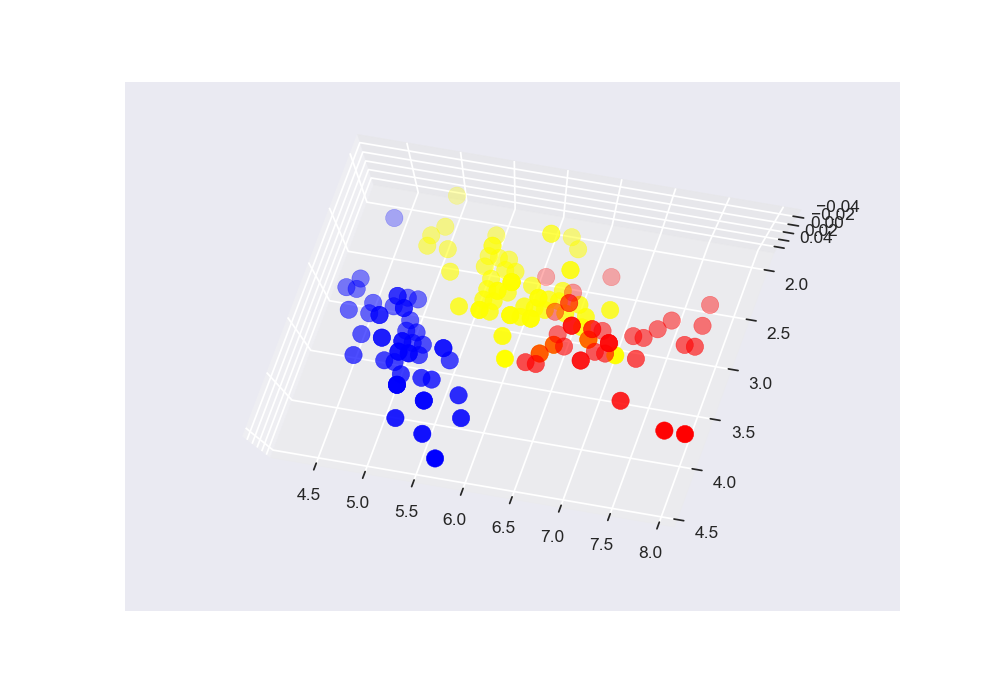

In [26]:
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.scatter3D(x[y_kmeans==0,0],x[y_kmeans==0,1],s=100,c='red',label='Iris-setosa');
ax.scatter3D(x[y_kmeans==1,0],x[y_kmeans==1,1],s=100,c='blue',label='Iris-versicolour');
ax.scatter3D(x[y_kmeans==2,0],x[y_kmeans==2,1],s=100,c='yellow',label='Iris-virginica');
plt.show()